# Regridding debugging

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from astropy.io import fits

In [6]:
mission = 'COBE-FIRAS'

path = '/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/'
files = os.listdir(path + mission)

for file in files:
    if file != 'regridded':
        obs = fits.open(path + mission + '/' + file)
        print(file)
        print()
        pprint(obs[0].header)
        print()
        pprint(obs[1].header)
        print('\n-------------\n')

FIRAS_LINE_EMISSION_MAP_HIGH.FITS

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '03/12/97'           / FITS file creation date (dd/mm/yy)             
ORIGIN  = 'CDAC    '           /  Cosmology Data Analysis Center                
TELESCOP= 'COBE    '           /  COsmic Background Explorer satellite          
INSTRUME= 'FIRAS   '           /  COBE instrument [DIRBE, DMR, FIRAS]     

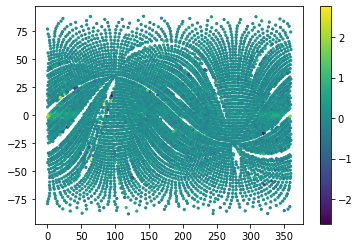

In [15]:
obs = fits.open(path + mission + '/FIRAS_LINE_EMISSION_MAP_HRES.FITS')
cm = plt.scatter(obs[1].data['GAL_LON'], obs[1].data['GAL_LAT'], c=obs[1].data['LINE_FLU'][:, 2], s=5)
plt.colorbar(cm)

XTENSION= 'BINTABLE'           /Written by IDL:  Fri May  6 14:35:23 2016       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                    4 /Number of bytes per row                         
NAXIS2  =             50331648 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    1 /Number of columns                               
TFORM1  = 'E       '           /Real*4 (floating point)                         
TTYPE1  = 'I       '           / Intensity map                                  
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
NSIDE   =                 20

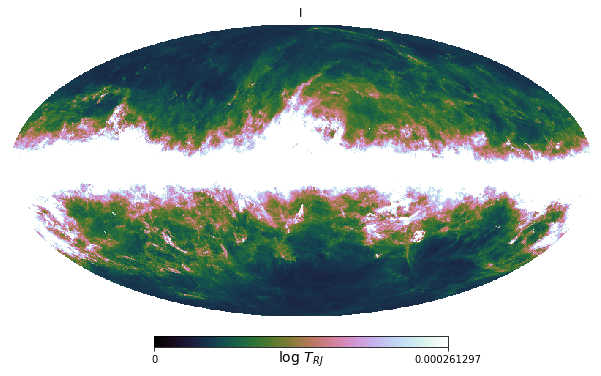

In [ ]:
import healpy as hp

mission = 'Planck'
log = False

# Available files:
#  - COM_CompMap_dust-commander_0256_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F545_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F857_2048_R2.00.fits
file = '/COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits'

obs = fits.open(path + mission + file)
if obs[1].header['ORDERING'] == 'NESTED':
    nest = True
else:
    nest = False
if 'commander' in file:
    value = 'I_ML'
    obs_data = obs[1].data[value] * 1e-6
elif 'GNILC' in file:
    value = 'I'
    freq = int(file.split('F')[1].split('_')[0])
    obs_data = obs[1].data[value] * 32.56 / freq**2
    vmax = 1 * 32.56 / freq**2
    vmin = 0 * 32.56 / freq**2
else:
    exit()
if log:
    obs_data = np.log10(obs_data)
    vmin = max(np.log10(vmin), obs_data.min())
    vmax = np.log10(vmax)
pprint(obs[1].header)
hp.mollview(obs_data, nest=nest, title=value, cmap='cubehelix', unit=r'log $T_{RJ}$', min=vmin, max=vmax)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  361                                                  
NAXIS2  =                  181                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRVAL1  =                    0                                                  
CDELT1  =                    1                                                  
CRPIX1  =                  181                                                  
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL2  =                    0                                                  
CDELT2  =                    1                                                  
CRPIX2  =                   

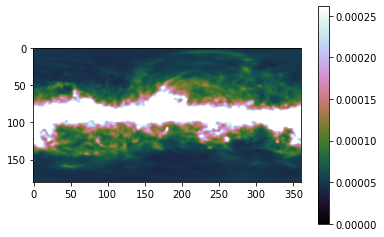

In [207]:
mission = 'Planck'

obs = fits.open(path + mission + '/regridded/temp/planck_Dust-GNILC-F353_regridded.fits')
pprint(obs[0].header)
print(obs[0].shape)
print(obs[0].data.max(), obs[0].data.mean())
cm = plt.imshow(obs[0].data[:, :][::-1, ::-1], vmin=0, vmax=0.000261297, cmap='cubehelix')
plt.colorbar(cm)

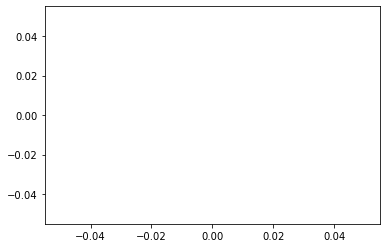

In [62]:
plt.plot(obs[0].data[:, 90, 180])